In [1]:
from time import perf_counter

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from light_dataloader import LightDataLoader, TensorDataLoader

In [2]:
# download and pre-load CIFAR10 to memory
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2

loader = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32)])
cifar = list(CIFAR10('/run/media/jj/HDD/datasets/CIFAR10', transform = loader, download=False))

time_per_batch_size: dict[str, dict[int, float]] = {}

In [3]:
images = torch.stack([i[0] for i in cifar])
labels = torch.tensor([i[1] for i in cifar])

# z-normalize
images -= images.mean()
images /= images.std()

images.shape, labels.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

# torch.utils.data.TensorDataset with torch.utils.data.DataLoader

In [4]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(images, labels)

In [5]:
time_per_batch_size['pytorch DataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_dataloader: pass
  time_per_batch_size['pytorch DataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader'])

  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████| 128/128 [01:32<00:00,  1.39it/s]

{1: 5.056920673000604, 9: 1.0555233009999938, 17: 0.9294956069998079, 25: 0.924267864000285, 33: 0.8158685359994706, 41: 0.7662788540001202, 49: 0.7367626630002633, 57: 0.7243840000001001, 65: 0.7494482599995536, 73: 0.7384384000006321, 81: 0.9115314160007983, 89: 0.8076577589999943, 97: 0.8843656199996985, 105: 0.7193818489995465, 113: 0.7013859079997928, 121: 0.8047370189997309, 129: 0.880846136999935, 137: 1.0209822530005113, 145: 0.9852147689998674, 153: 0.8300937540006998, 161: 0.8010897530002694, 169: 0.7448508030001904, 177: 0.9269928659996367, 185: 0.7376987139996345, 193: 0.7844280250001248, 201: 0.7592707769999834, 209: 0.7830777050003235, 217: 0.7425629299996217, 225: 0.7587144399994941, 233: 0.9209691169999132, 241: 0.7279985710001711, 249: 0.6222748000000138, 257: 0.6241727919996265, 265: 0.6221275679999962, 273: 0.6405280520002634, 281: 0.6149667549998412, 289: 0.6106998719997137, 297: 0.5980349760002355, 305: 0.5999500749994695, 313: 0.599961126999915, 321: 0.59800464099

In [6]:
time_per_batch_size['pytorch DataLoader with pin_memory'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True, pin_memory = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['pytorch DataLoader with pin_memory'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader with pin_memory'])

100%|██████████| 128/128 [01:52<00:00,  1.14it/s]

{1: 7.504073783000422, 9: 1.6667131700005484, 17: 1.1892489800002295, 25: 0.854134047000116, 33: 0.8026207220000288, 41: 0.7053968480004187, 49: 0.7566039070006809, 57: 0.7234601669997573, 65: 0.7117488540006889, 73: 0.7311029580005197, 81: 0.6702550999998493, 89: 0.7146031910006059, 97: 0.6800081820001651, 105: 0.6787530689998675, 113: 0.6952857830001449, 121: 0.6785782910001217, 129: 0.6685300210001515, 137: 0.717793453000013, 145: 0.7304241009996986, 153: 0.7025505399997201, 161: 0.712698953000654, 169: 0.7162056680008391, 177: 0.8465880450003169, 185: 0.7826100129996121, 193: 0.7401765119993797, 201: 0.7412647649998689, 209: 0.7422302499999205, 217: 0.9422545170000376, 225: 0.7551852750002581, 233: 0.7526741689998744, 241: 0.807079741999587, 249: 0.7396563549991697, 257: 0.8326314570003888, 265: 0.749338964999879, 273: 0.746775166999214, 281: 0.7645940740003425, 289: 0.9001248380000106, 297: 0.7408420250003473, 305: 0.7518891669997174, 313: 0.7174902960005056, 321: 0.73028551400057

# TensorLoader

In [7]:
from tensorloader import TensorLoader
time_per_batch_size['TensorLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorLoader'])

100%|██████████| 128/128 [00:34<00:00,  3.74it/s]

{1: 0.7906125489998885, 9: 0.32075870700009546, 17: 0.29053976599971065, 25: 0.25927893500011123, 33: 0.2529310099998838, 41: 0.2681336100004046, 49: 0.27217058099995484, 57: 0.2683645980005167, 65: 0.2660713930008569, 73: 0.24849101299969334, 81: 0.2801269219999085, 89: 0.2854025369997544, 97: 0.2848890349996509, 105: 0.28444600199964043, 113: 0.2843718899994201, 121: 0.2733302579999872, 129: 0.28133564299969294, 137: 0.28728554799999984, 145: 0.2798341049992814, 153: 0.2963492460003181, 161: 0.28939710600025137, 169: 0.27993052100009663, 177: 0.27988332900076784, 185: 0.26455884799997875, 193: 0.2647776249996241, 201: 0.2624409680001918, 209: 0.2859447230002843, 217: 0.2651000709993241, 225: 0.25638789999993605, 233: 0.2732285169995521, 241: 0.26656541600004857, 249: 0.26240237900037755, 257: 0.2604178439996758, 265: 0.2664827349999541, 273: 0.2679597609994744, 281: 0.28927652800030046, 289: 0.2617610010001954, 297: 0.2591067359999215, 305: 0.2602645719998691, 313: 0.2778561329996591

# LightDataLoader

In [8]:
time_per_batch_size['LightDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = LightDataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['LightDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['LightDataLoader'])

100%|██████████| 128/128 [01:25<00:00,  1.49it/s]

{1: 1.4828510500001357, 9: 0.6489250710001215, 17: 0.6230077550007991, 25: 0.6982319890003055, 33: 0.6838908330000777, 41: 0.6180309499995928, 49: 0.616452692999701, 57: 0.6400559289995726, 65: 0.6593901129999722, 73: 0.6805151339995064, 81: 0.6585113689998252, 89: 0.70070688099986, 97: 0.6592530139996597, 105: 0.6700795899996592, 113: 0.5877531859996452, 121: 0.5690292079998471, 129: 0.5715619039992816, 137: 0.5585285799998019, 145: 0.5638598649993583, 153: 0.561965040999894, 161: 0.5528265599996303, 169: 0.5768712700000833, 177: 0.561838957000873, 185: 0.5675871040002676, 193: 0.5677168530000927, 201: 0.5734509889998662, 209: 0.5843486379999376, 217: 0.5825749930008897, 225: 0.573815246999402, 233: 0.7544476709999799, 241: 0.6316983679998884, 249: 0.5861388000002989, 257: 0.5988287339996532, 265: 0.5867383099994186, 273: 0.7295187219997388, 281: 0.5928531419995124, 289: 0.6132445120001648, 297: 0.5935399749996577, 305: 0.5837482549995912, 313: 0.7420059930000207, 321: 0.5851140389995

# TensorDataLoader

In [9]:
time_per_batch_size['TensorDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader'])

100%|██████████| 128/128 [00:27<00:00,  4.65it/s]

{1: 0.4645988769998439, 9: 0.25946328499958327, 17: 0.2702037360004397, 25: 0.2577978949993849, 33: 0.2568779170005655, 41: 0.2611390570000367, 49: 0.2635655300000508, 57: 0.262664367999605, 65: 0.25215553700036253, 73: 0.2527889389994016, 81: 0.2588474390004194, 89: 0.24962711299940565, 97: 0.25469737900039036, 105: 0.25104928800010384, 113: 0.23277615699953458, 121: 0.26855866400001105, 129: 0.22206342299978132, 137: 0.241614663999826, 145: 0.2931788810001308, 153: 0.2566381429996909, 161: 0.2492654309999125, 169: 0.24150449500029936, 177: 0.2539029950003169, 185: 0.2729580929999429, 193: 0.25385902499965596, 201: 0.22996608599987667, 209: 0.2359409089995097, 217: 0.22698976100036816, 225: 0.2363461990007636, 233: 0.22494794199974422, 241: 0.24558632200023567, 249: 0.24268060400027025, 257: 0.22005515399996511, 265: 0.23301213000013377, 273: 0.28357958200012945, 281: 0.24094571299974632, 289: 0.22393498000019463, 297: 0.242412035999223, 305: 0.23488602199995512, 313: 0.21003744399968

In [10]:
time_per_batch_size['TensorDataLoader memory_efficient'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True, memory_efficient=True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader memory_efficient'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader memory_efficient'])

100%|██████████| 128/128 [00:27<00:00,  4.62it/s]

{1: 1.4807523400004357, 9: 0.2653984529997615, 17: 0.19145119299992075, 25: 0.176772539999547, 33: 0.14383535100023437, 41: 0.13526396300039778, 49: 0.14356827899973723, 57: 0.13521501600007468, 65: 0.15541310899970995, 73: 0.18370871400020405, 81: 0.1535227690001193, 89: 0.18642751999959728, 97: 0.20851646900064225, 105: 0.19784299099956115, 113: 0.20294544099942868, 121: 0.24706138600049599, 129: 0.2574267599993618, 137: 0.2769711509999979, 145: 0.26402035299997806, 153: 0.2639166420003676, 161: 0.3224050749995513, 169: 0.2785383839991482, 177: 0.2467257009993773, 185: 0.24634856899956503, 193: 0.24318471399965347, 201: 0.30817973200009874, 209: 0.24663539500033949, 217: 0.24463909500082082, 225: 0.25618829499944695, 233: 0.24953049200030364, 241: 0.2518920389993582, 249: 0.24450641100065695, 257: 0.24432285399961984, 265: 0.24332084100024076, 273: 0.2480116149999958, 281: 0.24261678299990308, 289: 0.2535121660002915, 297: 0.24915628300004755, 305: 0.23543016799976613, 313: 0.2430060

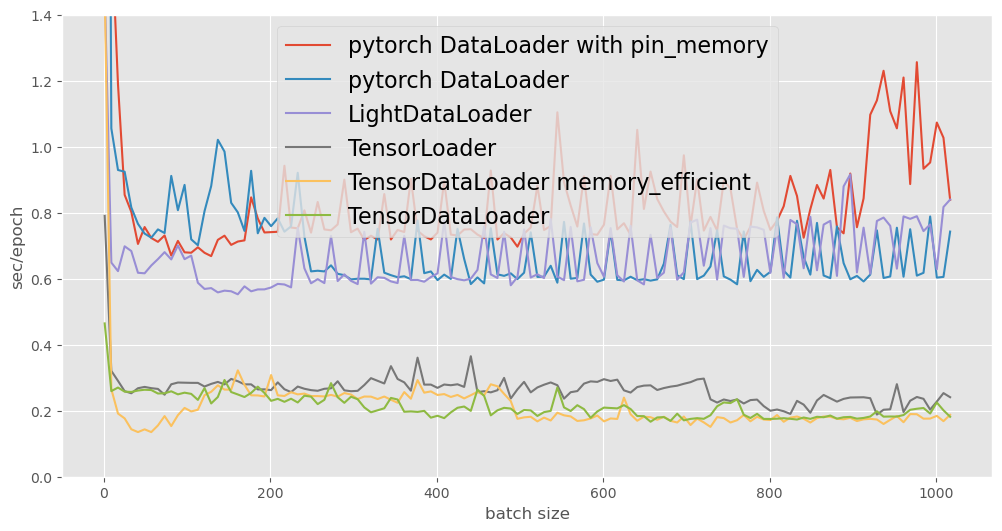

In [19]:
import numpy as np
plt.style.use('ggplot')
plt.tight_layout()

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(list(x[1].values())), reverse = True)

for key, vals_dict in time_per_batch_size_t:
  plt.plot(list(vals_dict.keys()), list(vals_dict.values()), label = key)

plt.xlabel('batch size')
plt.ylabel('sec/epoch')
plt.ylim(0, 1.4)
plt.legend(fontsize = 16, loc = 'upper center')
plt.gcf().set_size_inches(12, 6)
plt.show()

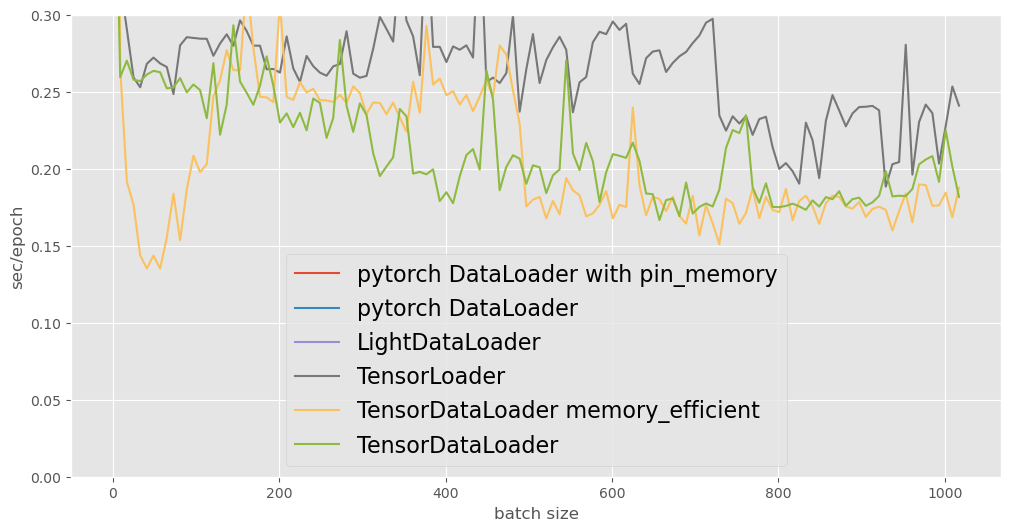

In [21]:
import numpy as np
plt.style.use('ggplot')
plt.tight_layout()

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(list(x[1].values())), reverse = True)

for key, vals_dict in time_per_batch_size_t:
  plt.plot(list(vals_dict.keys()), list(vals_dict.values()), label = key)

plt.xlabel('batch size')
plt.ylabel('sec/epoch')
plt.ylim(0, 0.3)
plt.legend(fontsize = 16, loc = 'lower center')
plt.gcf().set_size_inches(12, 6)
plt.show()

In [22]:
for key, vals_dict in time_per_batch_size_t:
    print(f'{key.ljust(40)} {np.sum(list(vals_dict.values()))} sec.')

pytorch DataLoader with pin_memory       111.98705495800186 sec.
pytorch DataLoader                       91.97955931899742 sec.
LightDataLoader                          85.6141583699964 sec.
TensorLoader                             34.081380163003814 sec.
TensorDataLoader memory_efficient        27.51863441199839 sec.
TensorDataLoader                         27.336020227994595 sec.
